Netflix is a subscription-based streaming service that allows our members to
watch TV shows and movies on an internet-connected device with over 200 million
subscribers as of January 2021.


## Loading Data


Netflix has thousands of shows that we can enjoy, of course netflix has data
from thousands of shows. therefore we can utilize the available data to improve
our data analytics skills.

Let's assume we have a friend with the ability to use python and analyze netflix
data provided in CSV format. They have started their analysis and suspect that
the average movie length is decreasing.

As proof, they have given us the average movie duration from 2011 to 2020, which
is 103, 101, 99, 100, 100, 100, 95, 95, 96, 93, and 90 minutes.

If we're going to examine this data, it would be smart to start working with
pandas. However, before we can do that, we need to create a DataFrame from
scratch. We'll begin by crafting a Python object that we've learned about in
Intermediate Python: a dictionary!


In [27]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]
movie_dict = {"years": years, "durations": durations}
print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


## Dataframe from dictionary


To convert "movie_dict" dictionary to dataframe we need Pandas library


In [28]:
import pandas as pd

durations_df = pd.DataFrame(movie_dict)
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


## Visual representation of our data


We have successfully converted dictionary data into dataframes using pandas. We
can directly see in the dataframe whether the duration of the movie from year to
year is decreasing. However, it will be very difficult because we have to read
the data of each row one by one and then compare with other rows.

We can very easily find out the trend of movie duration just by glancing at it
by visualizing the data using the matplotlib library.

Note: To ensure your plot is tested correctly, you'll need to initialize a
matplotlib.pyplot Figure object.


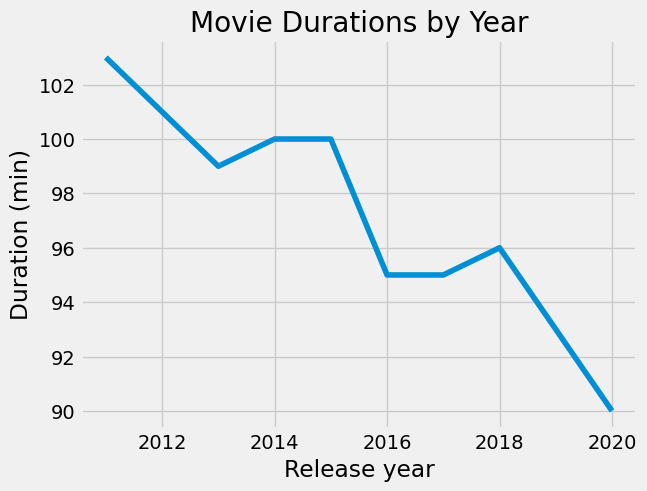

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()

title = "Movie Durations by Year"
xlabel = "Release year"
ylabel = "Duration (min)"

# add title and labels to line chart
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# plot line chart
plt.plot(years, durations)

# show chart
plt.show()

## Load data from CSV


How is it? Reading the data is much easier, right?

From the chart above, we can see that from 2011 - 2020, the average movie
duration experienced a downward trend.

However, with only our friend's summary data, we're restricted in the additional
analysis we can conduct. There are several questions about this trend that we
can't answer at the moment, including:

How does this trend appear over a more extended time frame? Could this be
explained by factors such as the genre of entertainment?

When we request the original CSV file our friend used for their analyses, they
happily provide it. We now have the CSV file, found at "netflix_data.csv". Let's
construct another DataFrame, this time encompassing all the data. Considering
the size of our friend's data, printing the entire DataFrame may not be
practical, so we'll examine it by printing just the first five rows.


In [30]:
# pandas already imported above
# load CSV
netflix_df = pd.read_csv("netflix_data.csv")

# print first 5 data
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

---


## Filtering Data


From the data above we can see that there are several types of shows on netflix.
in this case we will only analyze movies. let's get data of type “Movie”.

We also only need the title, country, genre, release year, and duration fields.


In [31]:
# pandas imported above


netflix_movie = netflix_df.query("type == 'Movie'")

netflix_subset = netflix_movie[
    ["title", "country", "genre", "release_year", "duration"]
]



print(netflix_subset["title"].head())

1     7:19
2    23:59
3        9
4       21
6      122
Name: title, dtype: object


## Visualize the movie dataframe


We have managed to get watch data that is of movie type only. Next, let's
visualize the data into a scatter plot to find out the distribution of the data


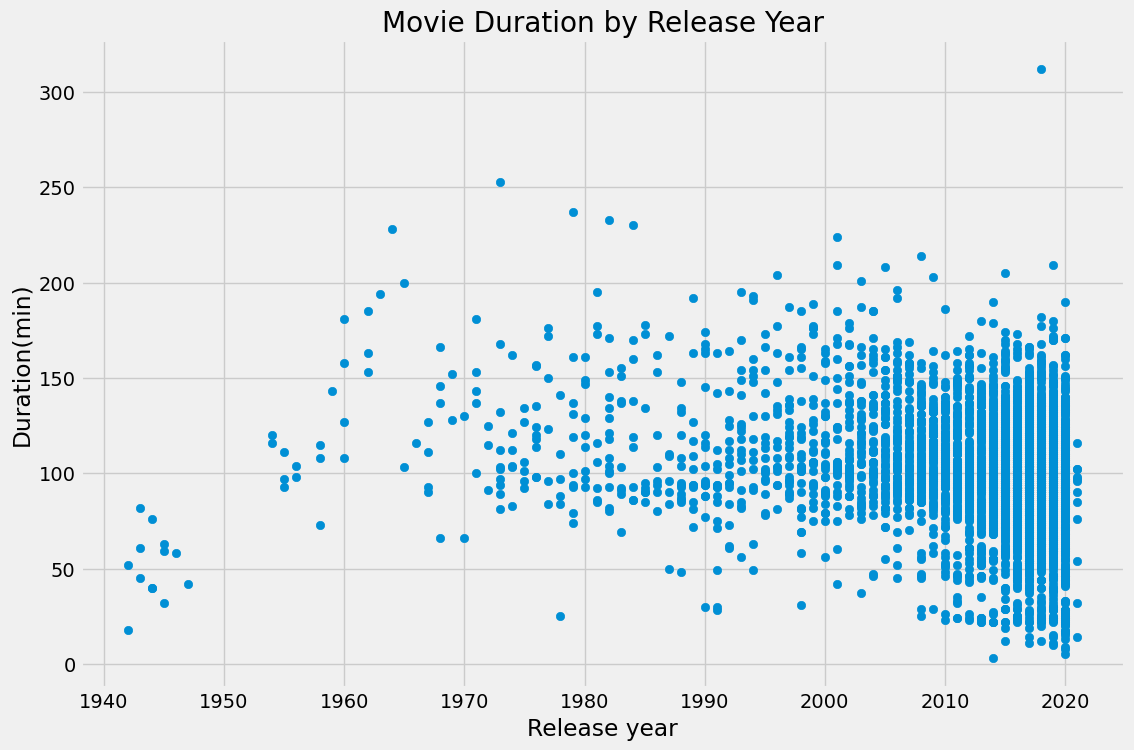

In [32]:
from matplotlib import pyplot as plt

release_year = netflix_subset["release_year"]
duration = netflix_subset["duration"]

title = "Movie Duration by Release Year"
xlabel = "Release year"
ylabel = "Duration(min)"

plt.figure(figsize=(12, 8))
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plot = plt.scatter(release_year, duration)
plt.show()

## Colorize the plot


From the visualization, we can see that the duration of the film varies greatly,
some even under 60 minutes. Therefore to know the visualization of movie
duration based on genre we will give color to the scatter plot. Give red color
for Children genre, blue for Stand-up, green for Documentaries, and black for
the rest.


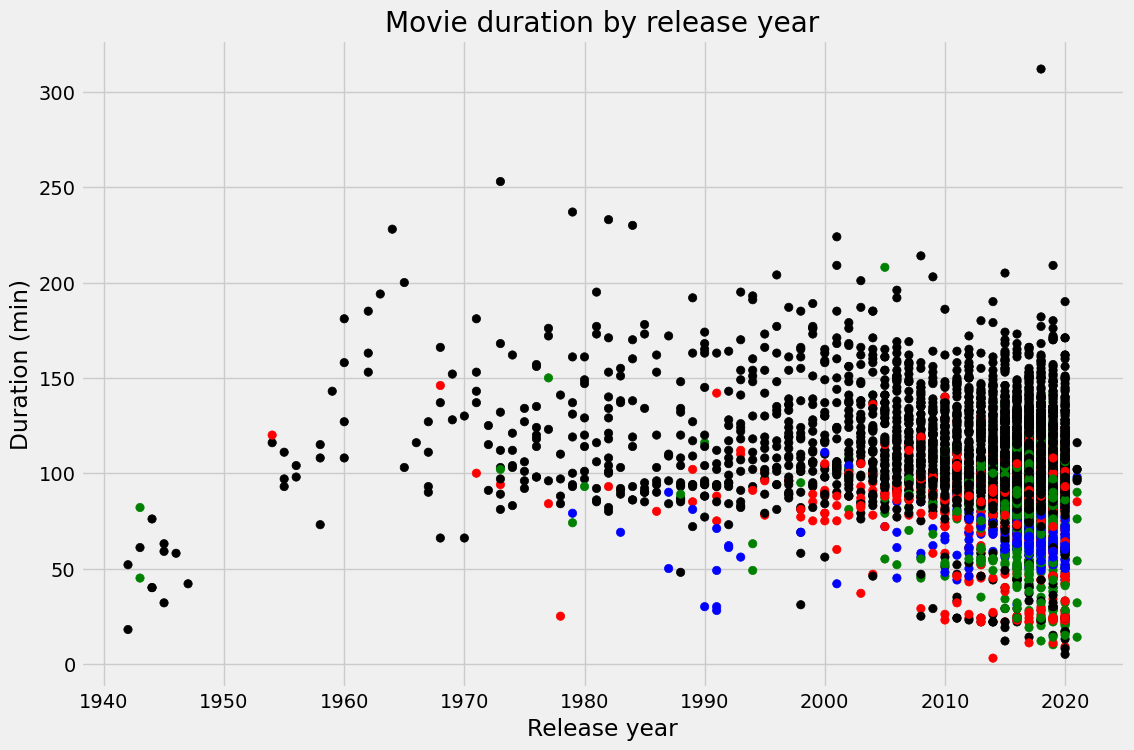

In [48]:
colors = []

for lab, row in netflix_subset.iterrows():
    if row["genre"] == "Children":
        colors.append("red")
    elif row["genre"] == "Stand-Up":
        colors.append("blue")
    elif row["genre"] == "Documentaries":
        colors.append("green")
    else:
        colors.append("black")

title = "Movie duration by release year"
xlabel = "Release year"
ylabel = "Duration (min)"

plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12, 8))
plot = plt.scatter(netflix_subset["release_year"], netflix_subset["duration"], c=colors)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()

## Filter the desired movie data


By giving colors to the scatter plot, it is easy to know the type of data. It
can be seen that most of those with short durations are colored red, blue, and
green, namely the genres of children, stand-up, and documentaries. This makes
sense because these genre films are mostly short duration rather than
blockbuster films.

We don't want to use the short-form movie genre, so we'll only use the black
plot.


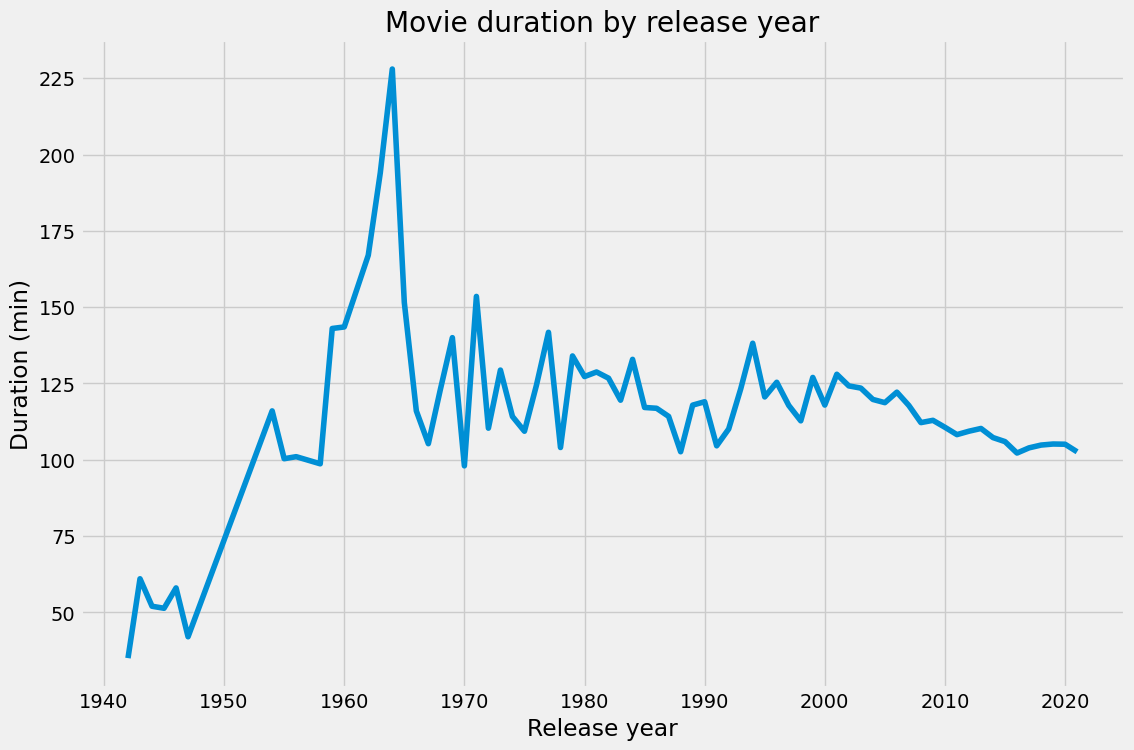

In [54]:
# add colors column to dataframe
netflix_subset["colors"] = colors

# select film with black color

movies = netflix_subset.query("colors == 'black'")

# average movie duration by release year

avg_durations = movies.groupby("release_year")["duration"].mean()

title = "Movie duration by release year"
xlabel = "Release year"
ylabel = "Duration (min)"

plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12, 8))

plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)


plt.plot(avg_durations)

plt.show()

## Conclusion


That's it! We managed to analyze whether the duration of movies on netflix has
decreased over the years. From the graph we can conclude that the duration of
the film experienced a significant increase between 1955 and 1965 to touch more
than 225 minutes, then the trend of the duration of the film did not change
significantly in the years after that, which was only between 100 to 150
minutes. but in the 2000s to 2020 there was a downward trend.
